# Libraries

In [1]:
# install.packages('')

In [1]:
library(caTools)
library(ggplot2)
library(repr)
options(repr.plot.width=4,repr.plot.height=4)
library(cluster)

# Read data

In [21]:
root_dir="~/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/"
work_dir="Course data/Part 4 - Clustering/Section 25 - Hierarchical Clustering"
setwd(paste(root_dir,work_dir,sep=''))
df=read.csv('Mall_Customers.csv')[c('Annual.Income..k..','Spending.Score..1.100.')]
str(df)

'data.frame':	200 obs. of  2 variables:
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


# Scale

In [22]:
df_scaled=scale(df)
head(df_scaled)

Annual.Income..k..,Spending.Score..1.100.
-1.734646,-0.4337131
-1.734646,1.1927111
-1.696572,-1.7116178
-1.696572,1.0378135
-1.658498,-0.3949887
-1.658498,0.9990891


# Dendogramming

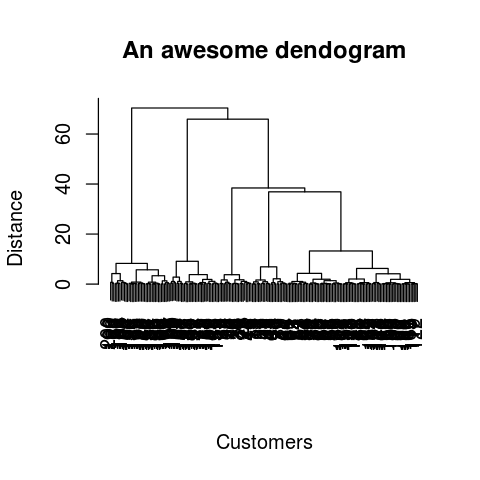

In [103]:
my_den=hclust(dist(df_scaled,method='euclidean'),method='ward.D')
plot(my_den,main='An awesome dendogram',xlab='Customers',ylab='Distance',sub='')

In [106]:
find_num_clusters=function(dend,num){
    tot=length(dend$height)+1
    diffs=diff(dend$height)
    val_lst=sort(diffs,TRUE)[1:num]
    out=vector("list",num)
    for(n in 1:length(val_lst)){
        pos=which(diffs==val_lst[n])
        out[[n]]=c(tot-pos,val_lst[n],dend$height[pos],dend$height[pos+1])
    }
    return(out)
}

find_num_clusters(my_den,5)

[[1]]
[1]  3.00000 27.50243 38.43337 65.93580

[[2]]
[1]  5.00000 23.63036 13.24855 36.87891

[[3]]
[1]  2.000000  4.468916 65.935796 70.404712

[[4]]
[1]  6.00000  4.13249  9.11606 13.24855

[[5]]
[1]  4.000000  1.554458 36.878908 38.433366

# Hierarchical Clustering

In [110]:
clusters=1:5

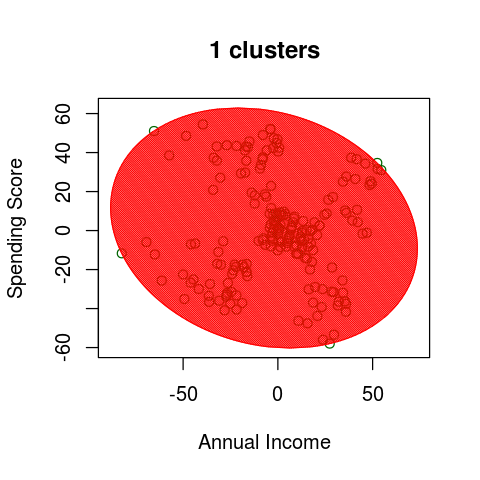

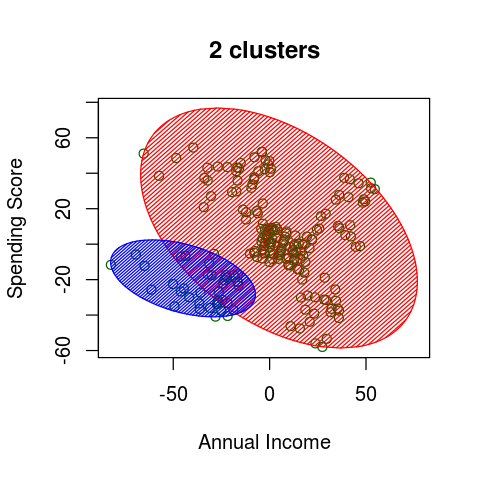

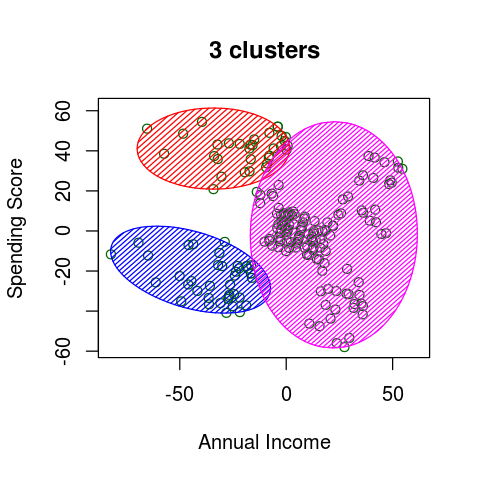

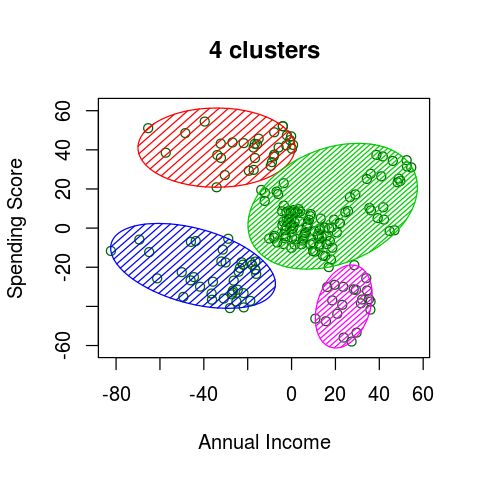

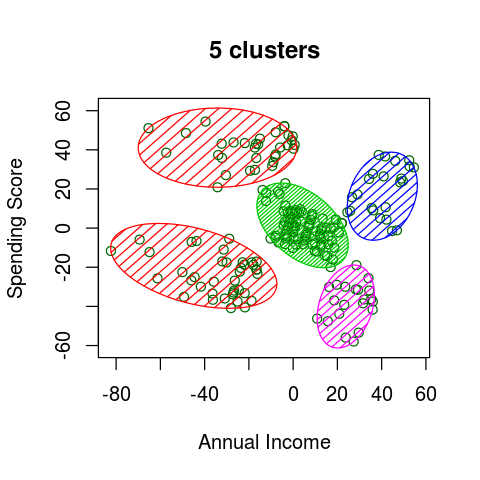

In [109]:
for(n in clusters){
    cluster=cutree(my_den,n)
    clusplot(df,cluster,lines=0,shade=TRUE,color=TRUE,span=TRUE,plotchar=FALSE,
             main=paste(n,'clusters'),xlab='Annual Income',ylab='Spending Score',sub='')    
}